# movie_budget_and_revenue.ipynb

In this notebook we will explore movie budget and revenue, as well as profit and ROI (Return on Investment).

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from reader import generic_reader

First we read in the movie data from `movies_clean.csv` and see that we have 6200 movies.

In [2]:
df_movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies_prepared.csv")
len(df_movies)

6200

Then we choose the columns we will work in this notebook.

In [3]:
columns_to_keep = ['movie_id', 'original_title', 'release_date', 'vote_average', 'vote_count', 'budget_2023_usd', 'revenue_2023_usd']
df_movies = df_movies[columns_to_keep].copy()
df_movies['release_date'] = pd.to_datetime(df_movies['release_date']) # Convert release_date into proper datetime objects
df_movies.sort_values(by="revenue_2023_usd", ascending=False)

,movie_id,original_title,release_date,vote_average,vote_count,budget_2023_usd,revenue_2023_usd
2648,19995,Avatar,2009-12-15,7.600,32656,336605225,4152467198
5466,299534,Avengers: Endgame,2019-04-24,8.238,26777,424293436,3336470881
4560,140607,Star Wars: The Force Awakens,2015-12-15,7.300,19987,314964276,2658843091
5221,299536,Avengers: Infinity War,2018-04-25,8.236,30989,364030217,2490470306
6049,76600,Avatar: The Way of Water,2022-12-14,7.610,12904,364407184,2415759634
...,...,...,...,...,...,...,...
1723,45835,El Muerto,2007-03-01,5.000,30,1469557,0
1722,29792,Fire Serpent,2007-02-24,4.700,23,2939115,0
2676,47386,YellowBrickRoad,2010-01-23,4.617,154,698679,0
2675,49250,Drones,2010-01-23,5.700,15,698679,0


We see that some movies have a revenue of 0.

This is because TMDB will report revenue as 0 if the value is missing.

So we now drop all the movies that have revenue of 0, and see that we are left with 4042 movies.

In [4]:
df_movies = df_movies[df_movies['budget_2023_usd'] != 0].copy()
df_movies = df_movies[df_movies['revenue_2023_usd'] != 0].copy()
len(df_movies)

4042

In [5]:
df_movies.describe()

,movie_id,release_date,vote_average,vote_count,budget_2023_usd,revenue_2023_usd
count,4.042000e+03,4042,4042.000000,4042.000000,4.042000e+03,4.042000e+03
mean,1.712827e+05,2011-03-02 03:17:43.433943552,6.270878,2676.493815,5.115258e+07,1.322323e+08
min,2.200000e+01,2000-01-07 00:00:00,1.800000,10.000000,3.000000e+00,1.000000e+00
25%,1.118775e+04,2005-11-06 18:00:00,5.800000,373.250000,1.083676e+07,6.031520e+06
50%,4.573750e+04,2010-11-05 12:00:00,6.300000,1198.500000,2.879737e+07,4.401183e+07
75%,3.005370e+05,2016-04-27 00:00:00,6.800000,3235.500000,6.435468e+07,1.442335e+08
max,1.160164e+06,2023-12-25 00:00:00,8.523000,38021.000000,6.079353e+08,4.152467e+09
std,2.247763e+05,NaN,0.821069,3989.047428,6.259693e+07,2.523232e+08


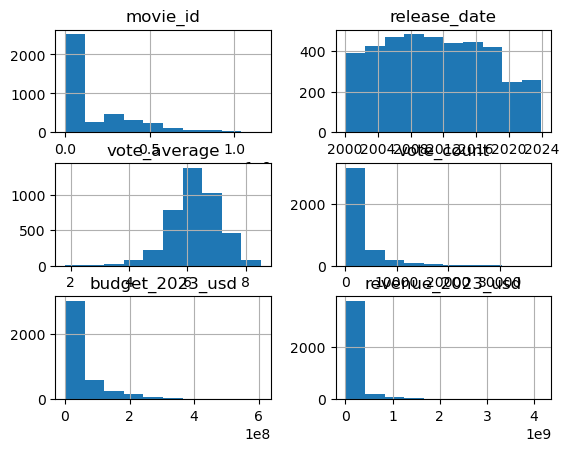

In [6]:
df_movies.hist();

Mention normal distribution of vote_average
Mention that most movies have a low budget, and most movies have a low vote_count

Now we calculate profit and ROI.

**_Profit = Revenue – Budget_**

**_ROI (%) = Profit / Budget × 100_**

In [7]:
df_movies['profit_2023_usd'] = df_movies['revenue_2023_usd'] - df_movies['budget_2023_usd']
df_movies['roi'] = ( df_movies['profit_2023_usd'] / df_movies['budget_2023_usd'] )*100
df_movies

,movie_id,original_title,release_date,vote_average,vote_count,budget_2023_usd,revenue_2023_usd,profit_2023_usd,roi
0,19214,Passion of Mind,2000-01-07,5.800,42,21233560,1361199,-19872361,-93.589398
1,17908,My Dog Skip,2000-01-12,6.700,280,10616780,62900459,52283679,492.462677
2,10471,Next Friday,2000-01-12,6.453,609,19464096,105862262,86398166,443.884812
3,10384,Supernova,2000-01-14,4.940,409,159251699,26237745,-133013954,-83.524355
4,10213,From Dusk Till Dawn 3: The Hangman's Daughter,2000-01-18,4.900,369,8847317,17017,-8830300,-99.807659
...,...,...,...,...,...,...,...,...,...
6195,850165,The Iron Claw,2023-12-21,7.540,1088,15900000,40130232,24230232,152.391396
6196,1025491,Freud's Last Session,2023-12-22,6.659,145,10000000,1697993,-8302007,-83.020070
6197,994108,All of Us Strangers,2023-12-22,7.443,898,5000000,14864960,9864960,197.299200
6198,823452,The Boys in the Boat,2023-12-25,7.233,311,40000000,54401583,14401583,36.003957


And now we we plot budget along the x-axis and revenue along the y-axis.

The red line represents break even.

We see that most movies are above the red line, so most movies actually do make a profit.

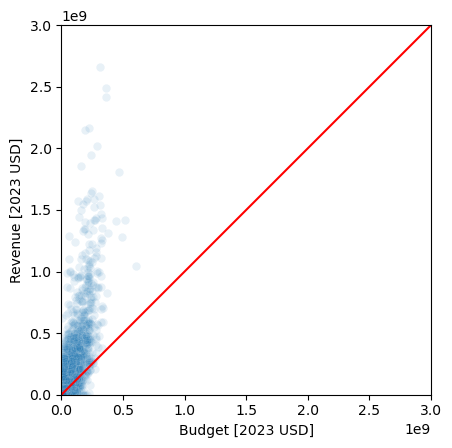

In [8]:
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['revenue_2023_usd'], alpha=0.1)
plt.xlim(0, 3e9)
plt.ylim(0, 3e9)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 3e9], [0, 3e9], color='red')
plt.xlabel("Budget [2023 USD]")
plt.ylabel("Revenue [2023 USD]");

Here we plot budget along the x-axis and profit along the y-axis.

Again the red line represents break even.

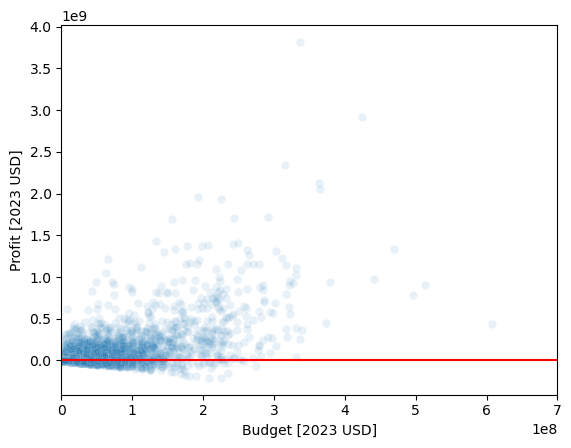

In [9]:
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['profit_2023_usd'], alpha=0.1)
plt.xlim(0, 7e8)
plt.plot([0, 7e8], [0, 0], color='red')
plt.xlabel("Budget [2023 USD]")
plt.ylabel("Profit [2023 USD]");

Now we explore which movies have made highest and lowest profit.

In [10]:
df_movies.sort_values(by="profit_2023_usd", ascending=False)

,movie_id,original_title,release_date,vote_average,vote_count,budget_2023_usd,revenue_2023_usd,profit_2023_usd,roi
2648,19995,Avatar,2009-12-15,7.600,32656,336605225,4152467198,3815861973,1133.631236
5466,299534,Avengers: Endgame,2019-04-24,8.238,26777,424293436,3336470881,2912177445,686.359297
4560,140607,Star Wars: The Force Awakens,2015-12-15,7.300,19987,314964276,2658843091,2343878815,744.172909
5221,299536,Avengers: Infinity War,2018-04-25,8.236,30989,364030217,2490470306,2126440089,584.138346
6049,76600,Avatar: The Way of Water,2022-12-14,7.610,12904,364407184,2415759634,2051352450,562.928652
...,...,...,...,...,...,...,...,...,...
6166,800158,The Killer,2023-10-25,6.575,2505,175000000,362113,-174637887,-99.793078
5886,512195,Red Notice,2021-11-04,6.756,6116,179917697,200319,-179717378,-99.888661
5591,398978,The Irishman,2019-11-01,7.583,7178,189501843,1154713,-188347130,-99.390659
5972,725201,The Gray Man,2022-07-13,6.931,3935,208232677,472712,-207759965,-99.772989


We see that there are several movies at the bottom of the list which have made huge losses:

E.g. "The Killer" from 2023 had a budget of 175 millions USD but only a revenue of 362,113 USD.

However, this is because these movies had very limited theatrical releases, and then were released on streaming services.

This trend of making movies and then releasing them directly (or almost directly) to streaming services started in 2015.

And even before 2015, films may be made as direct to VHS/DVD, but given a limited theatrical release first.

This means that in this exam project, we can not trust revenue to be a reliable predictor of a movies success.



## Budget vs. vote_average

In [11]:
positive_count = (df_movies['profit_2023_usd'] >= 0).sum()
print(positive_count)
negative_count = (df_movies['profit_2023_usd'] < 0).sum()
print(negative_count)
percentage = positive_count / len(df_movies)*100
print(percentage)

2464
1578
60.95992083127165


Netflix's Beasts of No Nation (2015)

<Axes: xlabel='budget_2023_usd', ylabel='vote_average'>

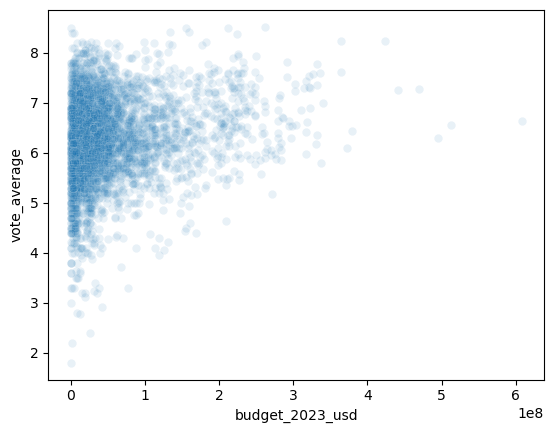

In [12]:
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['vote_average'], alpha=0.1)

<Axes: xlabel='budget_2023_usd', ylabel='vote_average'>

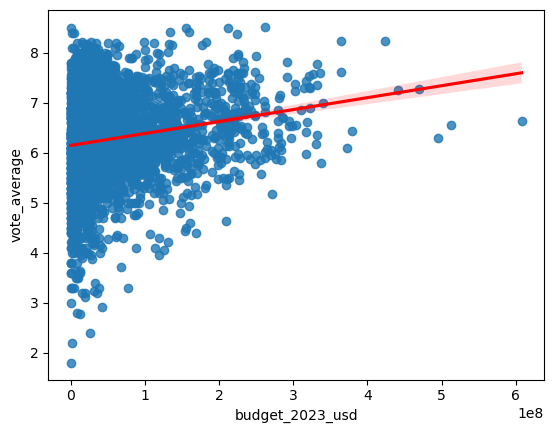

In [13]:
sns.regplot(x='budget_2023_usd', y='vote_average', data=df_movies, line_kws={'color': 'red'})

In [14]:
# Extract x and y
x = df_movies['budget_2023_usd']
y = df_movies['vote_average']

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(x, y)

# Print equation and R-value
print(f"Regression line: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-value: {r_value:.4f}")

Regression line: y = 0.0000x + 6.1486
R-value: 0.1823


We do see that there is a positive correlation between movie budget and vote_average.

Although the R-value is 0.1823 so it is weak.